In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/test_data/data_20220922_2247.csv")

In [3]:
data

,Unnamed: 0,dt,openvr_local_velocity_x,openvr_local_velocity_y,openvr_local_velocity_z,openvr_local_velocity_degx,openvr_local_velocity_degy,openvr_local_velocity_degz,imu_local_velocity_x,imu_local_velocity_y,...,openvr_local_accel_z,openvr_local_accel_degx,openvr_local_accel_degy,openvr_local_accel_degz,imu_local_accel_x,imu_local_accel_y,imu_local_accel_z,imu_local_accel_degx,imu_local_accel_degy,imu_local_accel_degz
0,0,0.100404,0.003468,-0.005150,0.002609,-0.000806,-0.001094,-0.002226,-0.106762,-0.146323,...,0.000008,-5.457997e-09,1.209225e-07,9.861570e-08,-39.729481,20.204461,-6.151141,-0.043239,0.115044,-0.143305
1,1,0.200405,0.001875,-0.007592,0.004799,0.000275,-0.000047,-0.000087,-0.106700,-0.146923,...,-0.000002,-2.564552e-08,-3.022632e-09,-9.962531e-09,-0.000000,-0.000000,-0.000000,0.127368,0.094644,0.042152
2,2,0.300458,0.001109,-0.006328,0.003672,0.003457,-0.001131,0.000981,-0.106959,-0.146630,...,-0.000021,-4.753640e-07,-1.092558e-07,1.084036e-07,-0.000000,-0.000000,-0.000000,-0.127371,-0.065822,-0.053906
3,3,0.400637,-0.011891,0.011147,-0.017936,0.031263,0.015793,-0.009522,-0.103705,-0.147332,...,0.000491,8.984933e-07,-2.478645e-06,3.711295e-07,-64.726175,-36.592053,-1.942492,0.061771,-0.027789,-0.149462
4,4,0.500639,-0.010097,0.005168,-0.012972,0.033298,-0.009809,-0.003260,-0.103315,-0.142794,...,0.000073,9.570578e-07,2.380878e-06,4.352697e-08,-62.984108,-18.752016,29.164563,0.074765,-0.335795,-0.449274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,14.648913,-0.001264,-0.008470,-0.000122,0.002496,-0.000655,-0.000830,-1.807386,-0.254175,...,-0.000021,7.629714e-08,-1.233066e-07,1.123519e-07,-0.000000,-0.000000,-0.000000,-0.153942,-0.007168,0.008262
146,146,14.748981,-0.001643,-0.006940,-0.000358,0.001434,-0.000623,0.001315,-1.822794,-0.254892,...,-0.245561,4.096285e+00,1.899618e+00,3.980133e+00,-0.000000,-0.000000,-0.000000,-0.153942,-0.007168,0.008262
147,147,14.849132,-0.001337,-0.007290,-0.000632,0.000396,0.000479,0.000256,-1.838212,-0.255610,...,-0.000002,3.992623e-08,-1.062313e-08,-1.196653e-08,-0.000000,-0.000000,-0.000000,-0.153942,-0.007168,0.008262
148,148,14.949261,-0.001785,-0.008483,-0.001128,0.001429,-0.000620,-0.000810,-1.853626,-0.256328,...,-0.000014,3.119163e-08,7.009344e-08,-1.013471e-07,-0.000000,-0.000000,-0.000000,-0.153942,-0.007168,0.008262


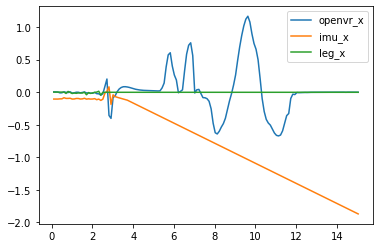

In [7]:
# plot x velocity
plt.plot(data['dt'],data['openvr_local_velocity_x'],label="openvr_x")
plt.plot(data['dt'],data['imu_local_velocity_x'],label="imu_x")
plt.plot(data['dt'],data['foot_local_velocity_x'],label="leg_x")
plt.legend()
plt.show()

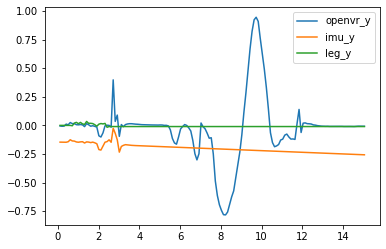

In [8]:
# plot x velocity
plt.plot(data['dt'],data['openvr_local_velocity_y'],label="openvr_y")
plt.plot(data['dt'],data['imu_local_velocity_y'],label="imu_y")
plt.plot(data['dt'],data['foot_local_velocity_y'],label="leg_y")
plt.legend()
plt.show()

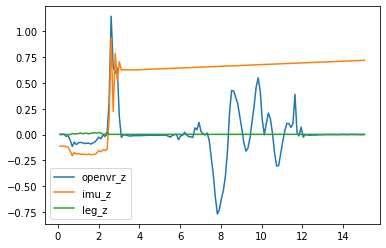

In [9]:
# plot x velocity
plt.plot(data['dt'],data['openvr_local_velocity_z'],label="openvr_z")
plt.plot(data['dt'],data['imu_local_velocity_z'],label="imu_z")
plt.plot(data['dt'],data['foot_local_velocity_z'],label="leg_z")
plt.legend()
plt.show()